<a href="https://colab.research.google.com/github/agatagera/Analiza-Cen-Energii/blob/main/ceny_energii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dane z https://energy.instrat.pl/wiecej-danych/

In [2]:
uploaded = files.upload()

Saving tge_rdb_energy_prices.csv to tge_rdb_energy_prices.csv


In [109]:
#Load the data
df = pd.read_csv(io.BytesIO(uploaded['tge_rdb_energy_prices.csv']))
df.head()

,index,Min. price [PLN/MWh],Max. price [PLN/MWh],Last price [PLN/MWh],Volume [MWh],index_utc
0,2020-08-28 00:00:00,150.02,167.67,167.67,800.0,NaN
1,2020-08-28 01:00:00,132.37,172.52,132.37,900.0,NaN
2,2020-08-28 02:00:00,119.31,172.52,121.91,900.0,NaN
3,2020-08-28 03:00:00,131.49,211.80,147.99,782.0,NaN
4,2020-08-28 04:00:00,136.12,217.75,147.99,665.0,NaN


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26719 entries, 0 to 26718
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 26719 non-null  object 
 1   Min. price [PLN/MWh]  24691 non-null  float64
 2   Max. price [PLN/MWh]  24691 non-null  float64
 3   Last price [PLN/MWh]  24691 non-null  float64
 4   Volume [MWh]          26719 non-null  float64
 5   index_utc             14712 non-null  object 
dtypes: float64(4), object(2)
memory usage: 1.2+ MB


In [111]:
df.describe()

,Min. price [PLN/MWh],Max. price [PLN/MWh],Last price [PLN/MWh],Volume [MWh]
count,24691.000000,24691.000000,24691.000000,26719.000000
mean,378.914067,442.534553,410.091459,373.662169
std,184.884898,205.721699,193.004829,675.650730
min,-2138.450000,-295.110000,-430.000000,0.000000
25%,259.455000,308.740000,283.525000,68.800000
50%,360.010000,412.460000,384.840000,233.900000
75%,471.175000,541.980000,505.370000,493.000000
max,2269.040000,3222.400000,2683.700000,32743.600000


In [113]:
min_data = min(df['index'])
max_data = max(df['index'])
print(min_data)
print(max_data)

2020-08-28 00:00:00
2024-10-18 23:00:00


In [114]:
#rozdzielenie godziny i daty

In [115]:
# Konwersja kolumny 'index' na format daty
df['index'] = pd.to_datetime(df['index'])

In [116]:
# Rozdzielenie na kolumnę 'data' i 'godzina'
df['data'] = df['index'].dt.date
df['godzina'] = df['index'].dt.time

In [117]:
df.head()

,index,Min. price [PLN/MWh],Max. price [PLN/MWh],Last price [PLN/MWh],Volume [MWh],index_utc,data,godzina
0,2020-08-28 00:00:00,150.02,167.67,167.67,800.0,NaN,2020-08-28,00:00:00
1,2020-08-28 01:00:00,132.37,172.52,132.37,900.0,NaN,2020-08-28,01:00:00
2,2020-08-28 02:00:00,119.31,172.52,121.91,900.0,NaN,2020-08-28,02:00:00
3,2020-08-28 03:00:00,131.49,211.80,147.99,782.0,NaN,2020-08-28,03:00:00
4,2020-08-28 04:00:00,136.12,217.75,147.99,665.0,NaN,2020-08-28,04:00:00


In [118]:
df = df.drop('index', axis=1)
df = df.drop('index_utc', axis=1)

In [119]:
df.head()

,Min. price [PLN/MWh],Max. price [PLN/MWh],Last price [PLN/MWh],Volume [MWh],data,godzina
0,150.02,167.67,167.67,800.0,2020-08-28,00:00:00
1,132.37,172.52,132.37,900.0,2020-08-28,01:00:00
2,119.31,172.52,121.91,900.0,2020-08-28,02:00:00
3,131.49,211.80,147.99,782.0,2020-08-28,03:00:00
4,136.12,217.75,147.99,665.0,2020-08-28,04:00:00


In [120]:
df.dtypes

,0
Min. price [PLN/MWh],float64
Max. price [PLN/MWh],float64
Last price [PLN/MWh],float64
Volume [MWh],float64
data,object
godzina,object


In [121]:
# Konwersja kolumny 'data' na format datetime
df['data'] = pd.to_datetime(df['data'])

# Usunięcie wierszy z datą sprzed 01 października 2023
df = df[df['data'] >= '2023-10-01']


In [122]:
max_data = max(df['data'])
print(max_data)
min_data = min(df['data'])
print(min_data)

2024-10-18 00:00:00
2023-10-01 00:00:00


## WIZUALIZACJA

In [48]:
avg_last_price_by_hour = df.groupby('godzina')['Last price [PLN/MWh]'].mean()

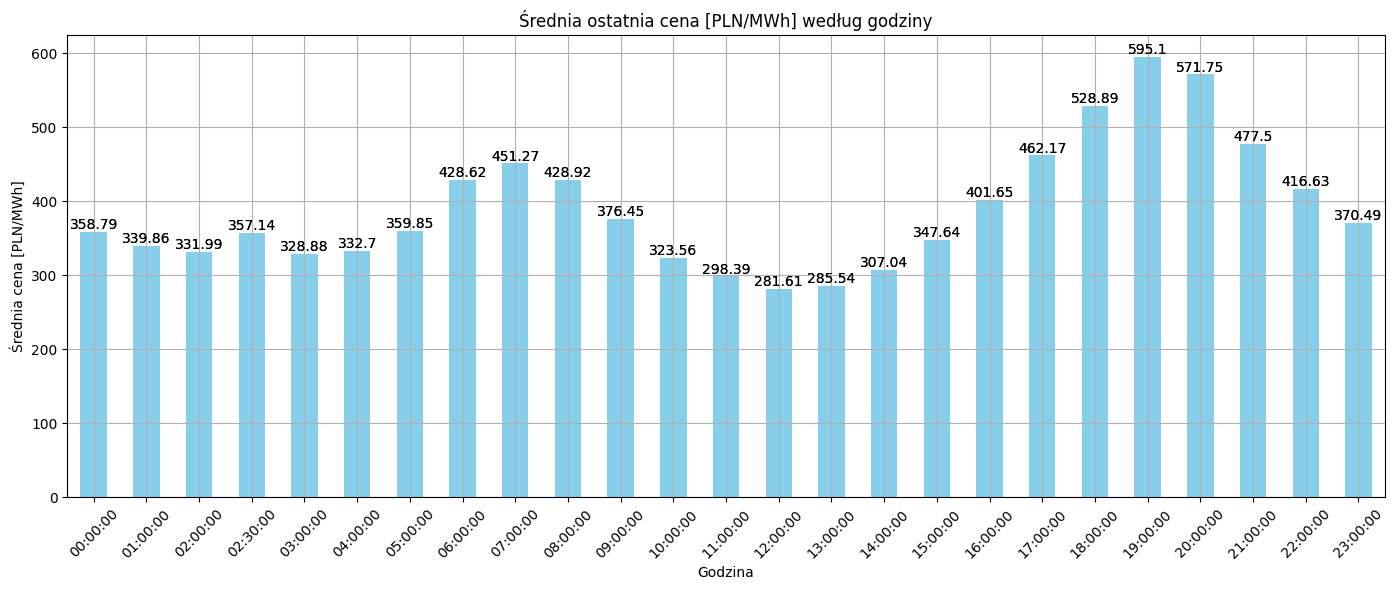

In [65]:
plt.figure(figsize=(17,6))
avg_last_price_by_hour.plot(kind='bar', color='skyblue')
bars = avg_last_price_by_hour.plot(kind='bar', color='skyblue')
for bar in bars.patches:
    # Dodajemy wartość średniej ceny nad każdym słupkiem
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             round(bar.get_height(), 2), ha='center', va='bottom')
plt.title('Średnia ostatnia cena [PLN/MWh] według godziny')
plt.xlabel('Godzina')
plt.ylabel('Średnia cena [PLN/MWh]')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [51]:
avg_max_price_by_hour = df.groupby('godzina')['Max. price [PLN/MWh]'].mean()

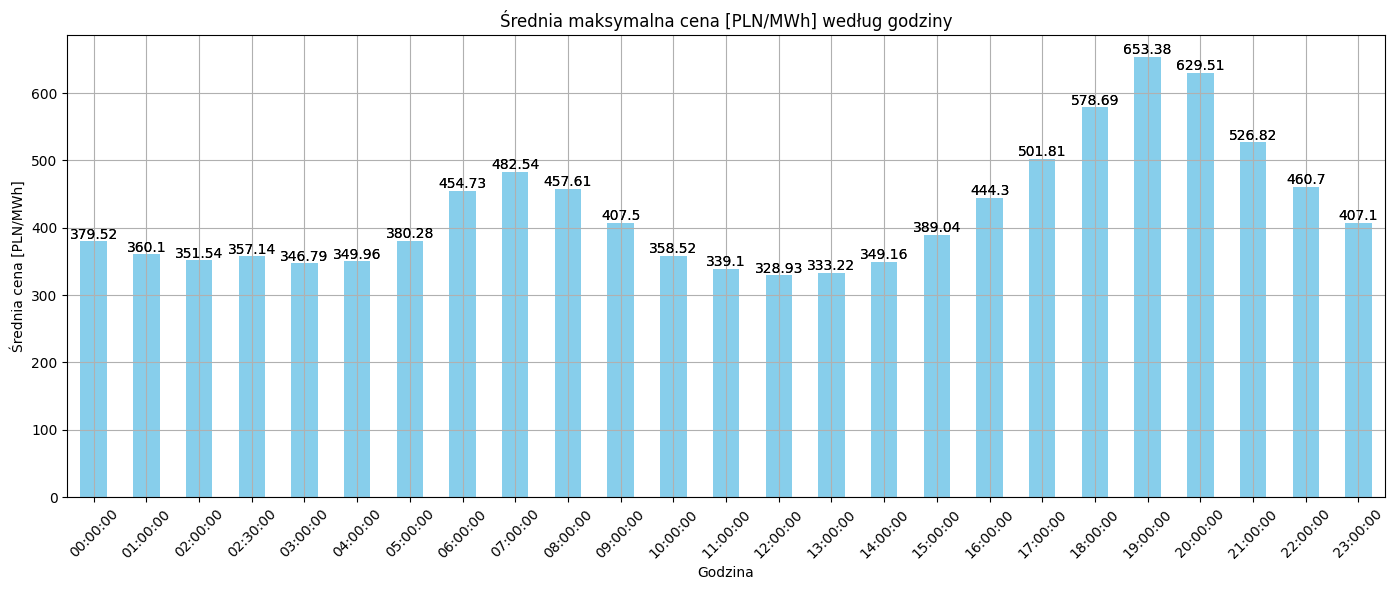

In [67]:
plt.figure(figsize=(17,6))
avg_max_price_by_hour.plot(kind='bar', color='skyblue')
bars = avg_max_price_by_hour.plot(kind='bar', color='skyblue')
for bar in bars.patches:
    # Dodajemy wartość średniej ceny nad każdym słupkiem
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             round(bar.get_height(), 2), ha='center', va='bottom')
plt.title('Średnia maksymalna cena [PLN/MWh] według godziny')
plt.xlabel('Godzina')
plt.ylabel('Średnia cena [PLN/MWh]')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [53]:
avg_min_price_by_hour = df.groupby('godzina')['Min. price [PLN/MWh]'].mean()

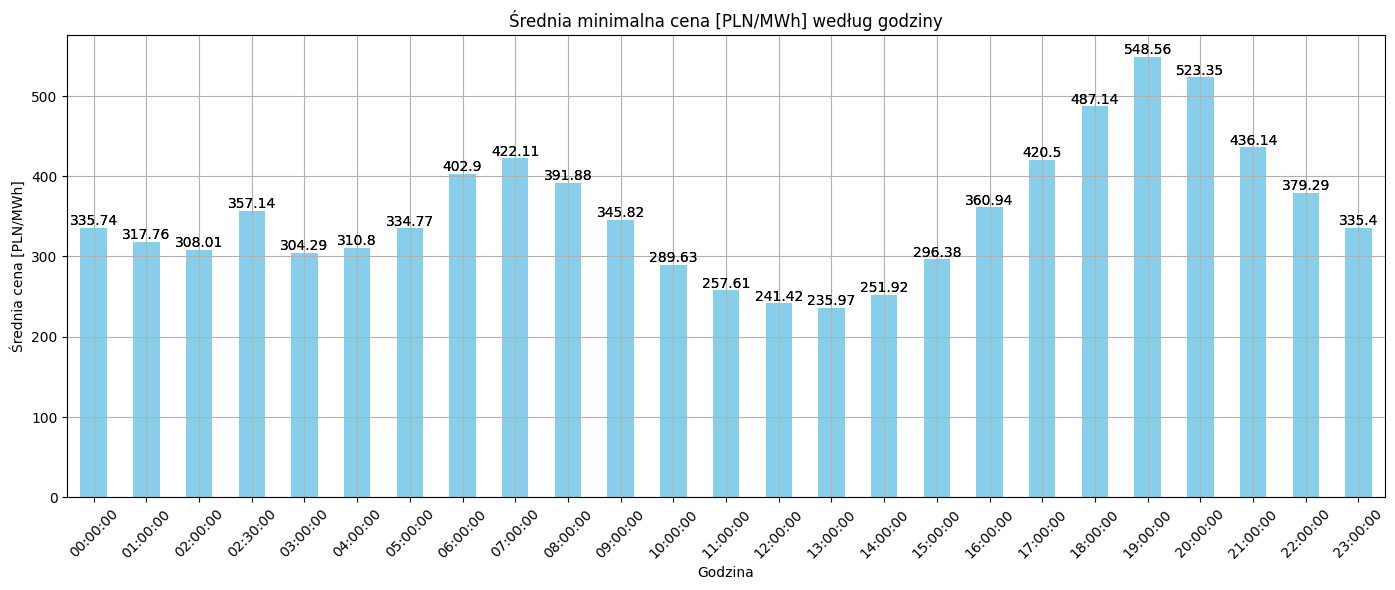

In [124]:
plt.figure(figsize=(17,6))
avg_min_price_by_hour.plot(kind='bar', color='skyblue')
bars = avg_min_price_by_hour.plot(kind='bar', color='skyblue')
for bar in bars.patches:
    # Dodajemy wartość średniej ceny nad każdym słupkiem
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), ha='center', va='bottom')
plt.title('Średnia minimalna cena [PLN/MWh] według godziny')
plt.xlabel('Godzina')
plt.ylabel('Średnia cena [PLN/MWh]')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [123]:
# Volume [MWh]
avg_valume = df.groupby('godzina')['Volume [MWh]'].mean()

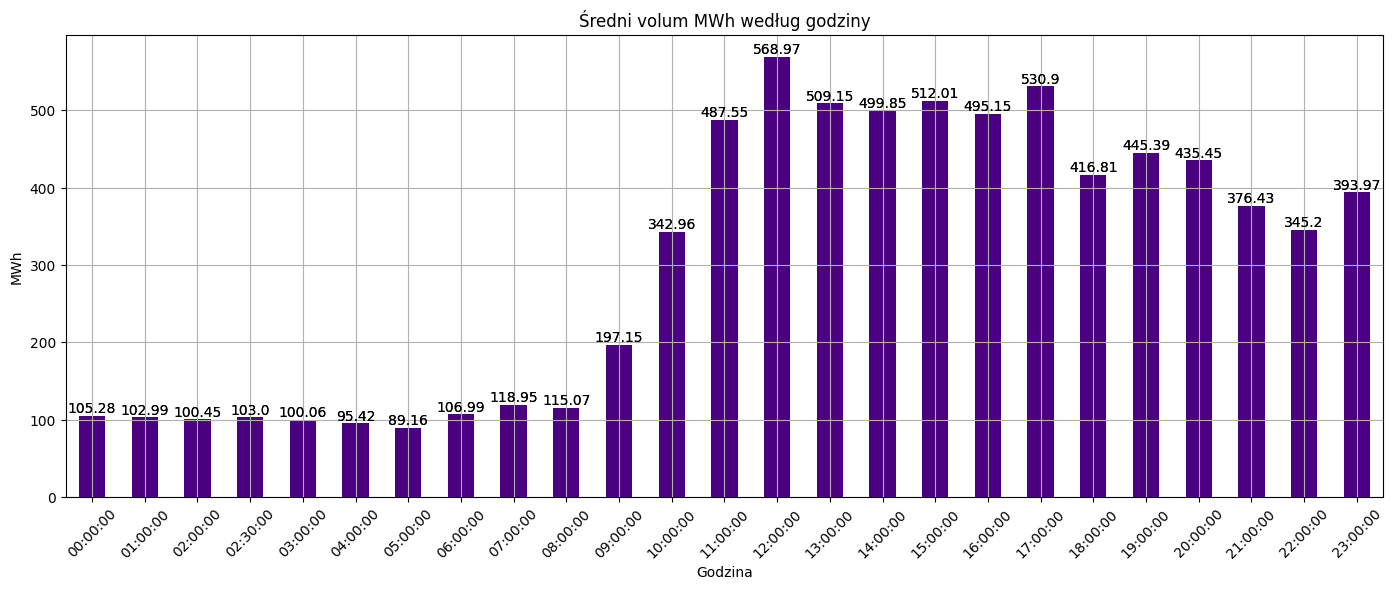

In [128]:
plt.figure(figsize=(17,6))
avg_valume.plot(kind='bar', color='indigo')
bars = avg_valume.plot(kind='bar', color='indigo')
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), ha='center', va='bottom')
plt.title('Średni volum MWh według godziny')
plt.xlabel('Godzina')
plt.ylabel('MWh')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##Ostatnie 3 miesiące

In [73]:
#ostatnie 3 miesiące
df_3_months = df[df['data'] >= '2024-07-01']

In [64]:
min_data_3_months = min(df_3_months['data'])
print(min_data_3_months)
max_data_3_months = max(df_3_months['data'])
print(max_data_3_months)

2024-07-01 00:00:00
2024-10-18 00:00:00


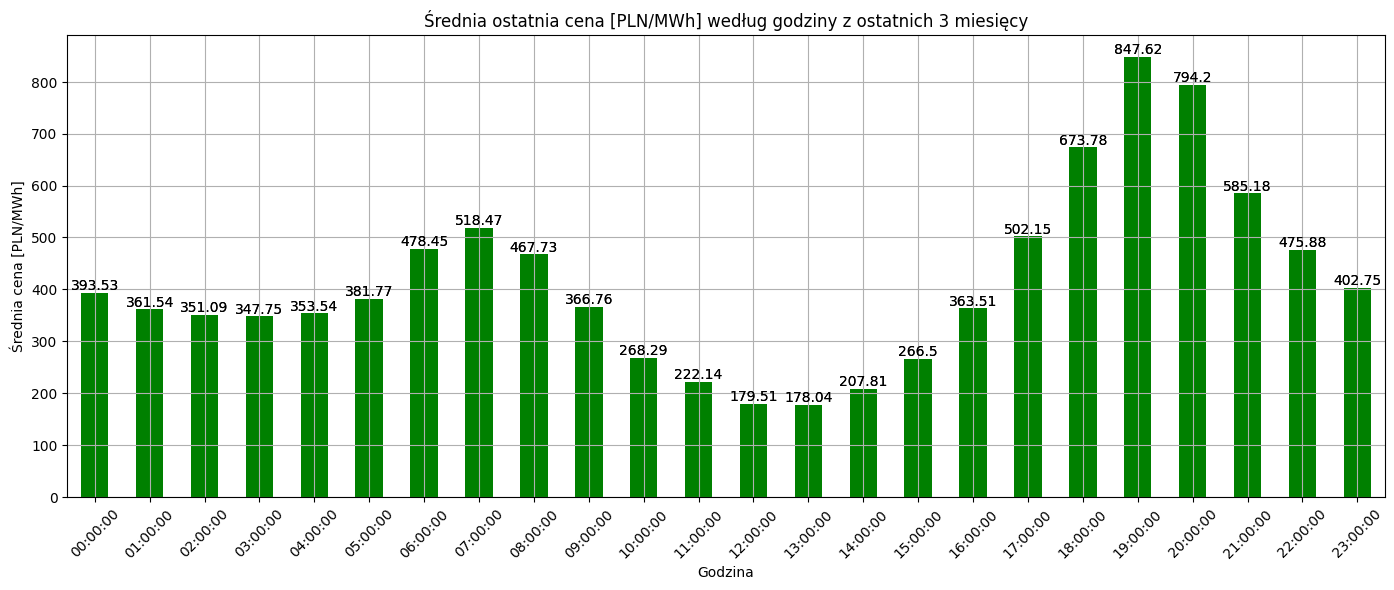

In [66]:
avg_last_price_by_hour_3_months = df_3_months.groupby('godzina')['Last price [PLN/MWh]'].mean()

plt.figure(figsize=(17,6))
avg_last_price_by_hour_3_months.plot(kind='bar', color='green')
bars = avg_last_price_by_hour_3_months.plot(kind='bar', color='green')
for bar in bars.patches:
    # Dodajemy wartość średniej ceny nad każdym słupkiem
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             round(bar.get_height(), 2), ha='center', va='bottom')
plt.title('Średnia ostatnia cena [PLN/MWh] według godziny z ostatnich 3 miesięcy')
plt.xlabel('Godzina')
plt.ylabel('Średnia cena [PLN/MWh]')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

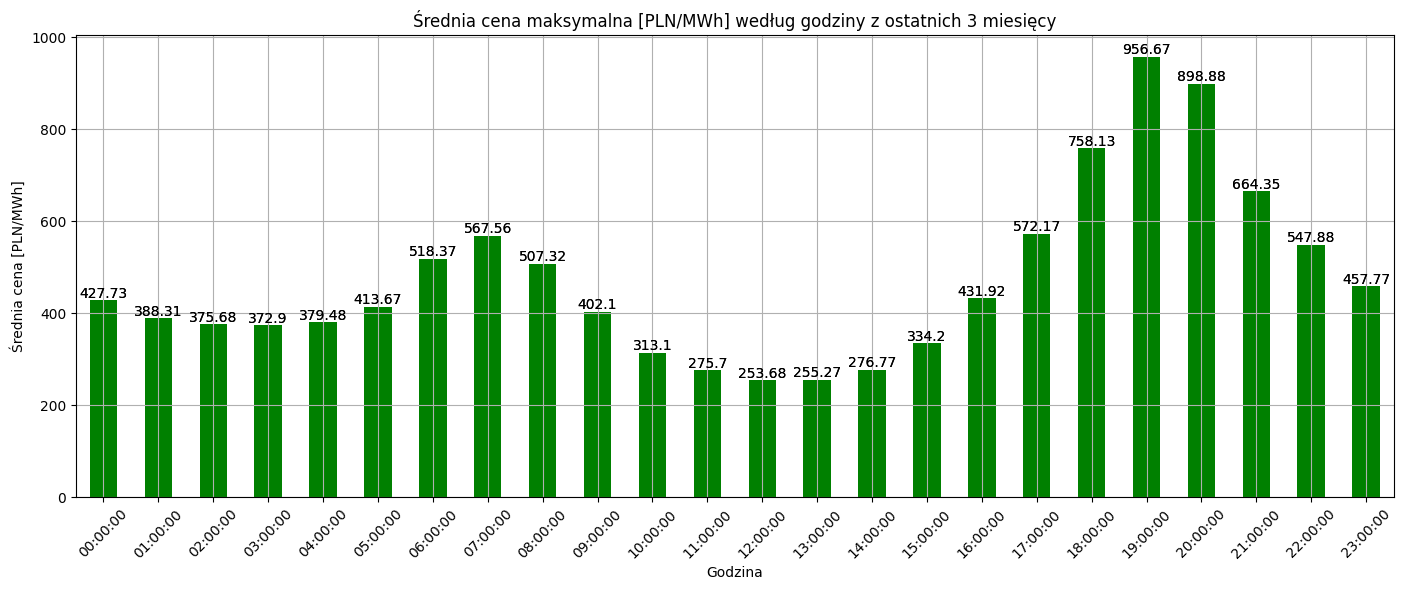

In [69]:
# średnia cen maksymalnych
avg_max_price_by_hour_3_months = df_3_months.groupby('godzina')['Max. price [PLN/MWh]'].mean()

plt.figure(figsize=(17,6))
avg_max_price_by_hour_3_months.plot(kind='bar', color='green')
bars = avg_max_price_by_hour_3_months.plot(kind='bar', color='green')
for bar in bars.patches:
    # Dodajemy wartość średniej ceny nad każdym słupkiem
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             round(bar.get_height(), 2), ha='center', va='bottom')
plt.title('Średnia cena maksymalna [PLN/MWh] według godziny z ostatnich 3 miesięcy')
plt.xlabel('Godzina')
plt.ylabel('Średnia cena [PLN/MWh]')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

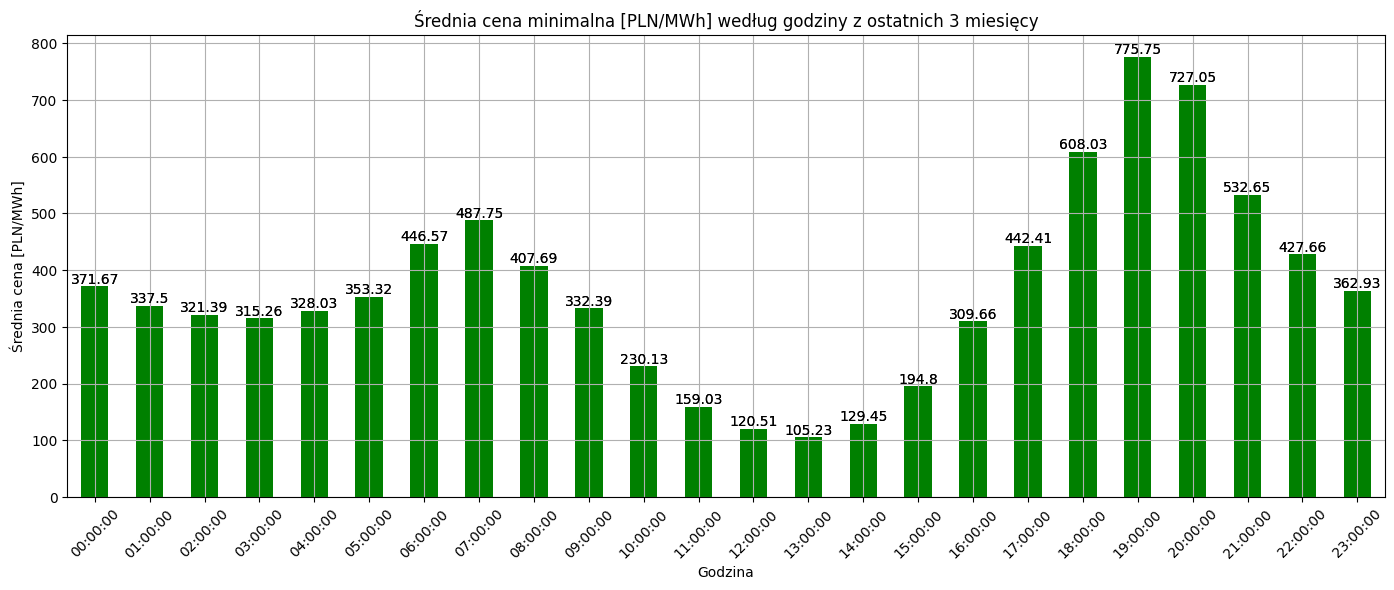

In [72]:
# średnia cen minimalnych
avg_min_price_by_hour_3_months = df_3_months.groupby('godzina')['Min. price [PLN/MWh]'].mean()

plt.figure(figsize=(17,6))
avg_min_price_by_hour_3_months.plot(kind='bar', color='green')
bars = avg_min_price_by_hour_3_months.plot(kind='bar', color='green')
for bar in bars.patches:
    # Dodajemy wartość średniej ceny nad każdym słupkiem
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             round(bar.get_height(), 2), ha='center', va='bottom')
plt.title('Średnia cena minimalna [PLN/MWh] według godziny z ostatnich 3 miesięcy')
plt.xlabel('Godzina')
plt.ylabel('Średnia cena [PLN/MWh]')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##ostatnie 30 dni

In [77]:
#ostatnie 3 miesiące
df_30_days = df[df['data'] >= '2024-09-18']

In [78]:
min_data_last_month = min(df_30_days['data'])
print(min_data_last_month)
max_data_last_month = max(df_30_days['data'])
print(max_data_last_month)

2024-09-18 00:00:00
2024-10-18 00:00:00


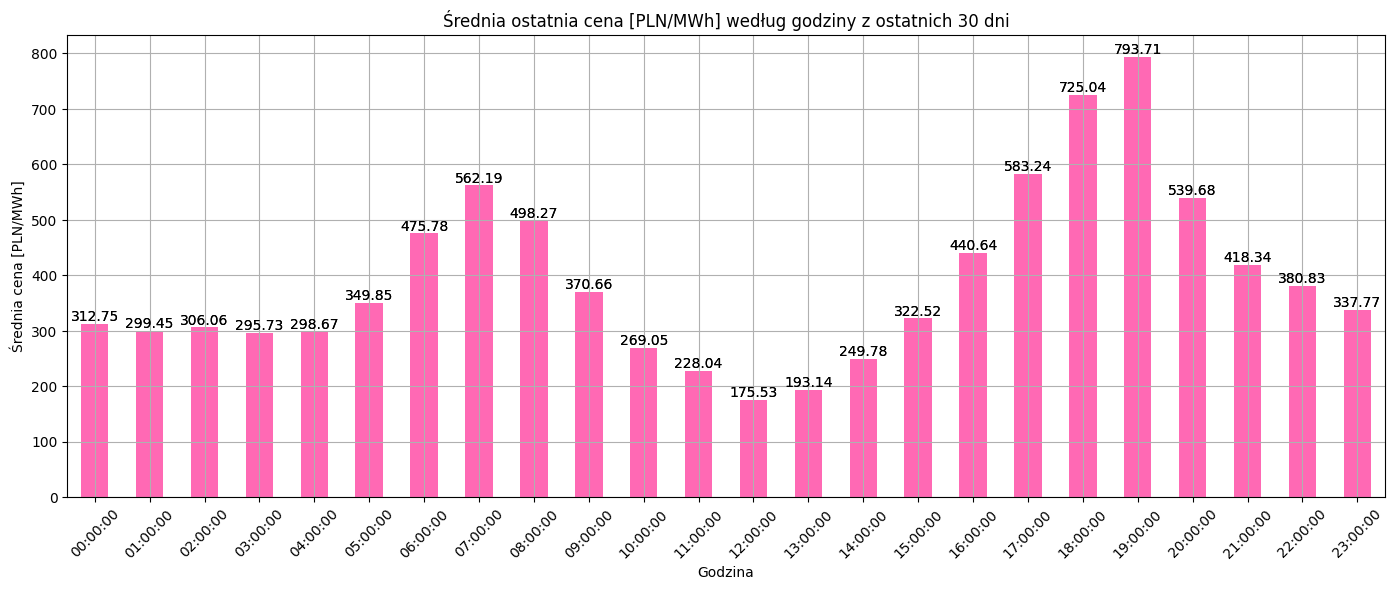

In [80]:
avg_last_price_by_df_30_days = df_30_days.groupby('godzina')['Last price [PLN/MWh]'].mean()

plt.figure(figsize=(17,6))
avg_last_price_by_df_30_days.plot(kind='bar', color='hotpink')
bars = avg_last_price_by_df_30_days.plot(kind='bar', color='hotpink')
for bar in bars.patches:
    # Dodajemy wartość średniej ceny nad każdym słupkiem
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             round(bar.get_height(), 2), ha='center', va='bottom')
plt.title('Średnia ostatnia cena [PLN/MWh] według godziny z ostatnich 30 dni')
plt.xlabel('Godzina')
plt.ylabel('Średnia cena [PLN/MWh]')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

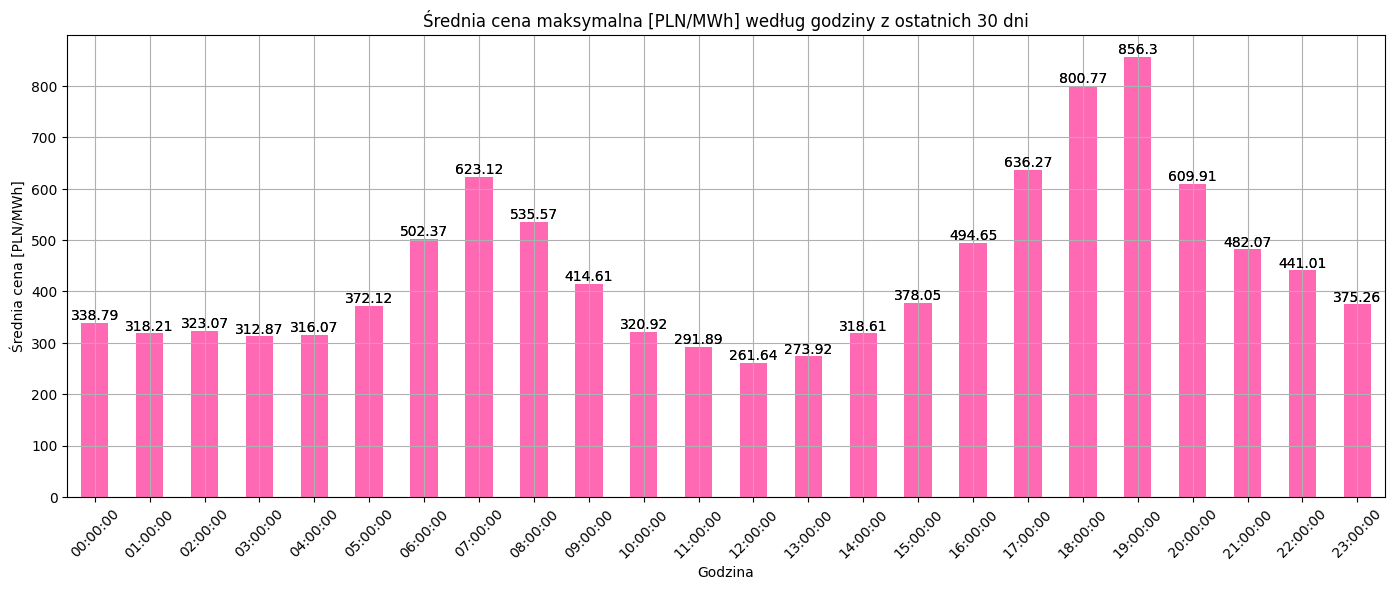

In [81]:
avg_max_price_by_df_30_days = df_30_days.groupby('godzina')['Max. price [PLN/MWh]'].mean()

plt.figure(figsize=(17,6))
avg_max_price_by_df_30_days.plot(kind='bar', color='hotpink')
bars = avg_max_price_by_df_30_days.plot(kind='bar', color='hotpink')
for bar in bars.patches:
    # Dodajemy wartość średniej ceny nad każdym słupkiem
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             round(bar.get_height(), 2), ha='center', va='bottom')
plt.title('Średnia cena maksymalna [PLN/MWh] według godziny z ostatnich 30 dni')
plt.xlabel('Godzina')
plt.ylabel('Średnia cena [PLN/MWh]')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

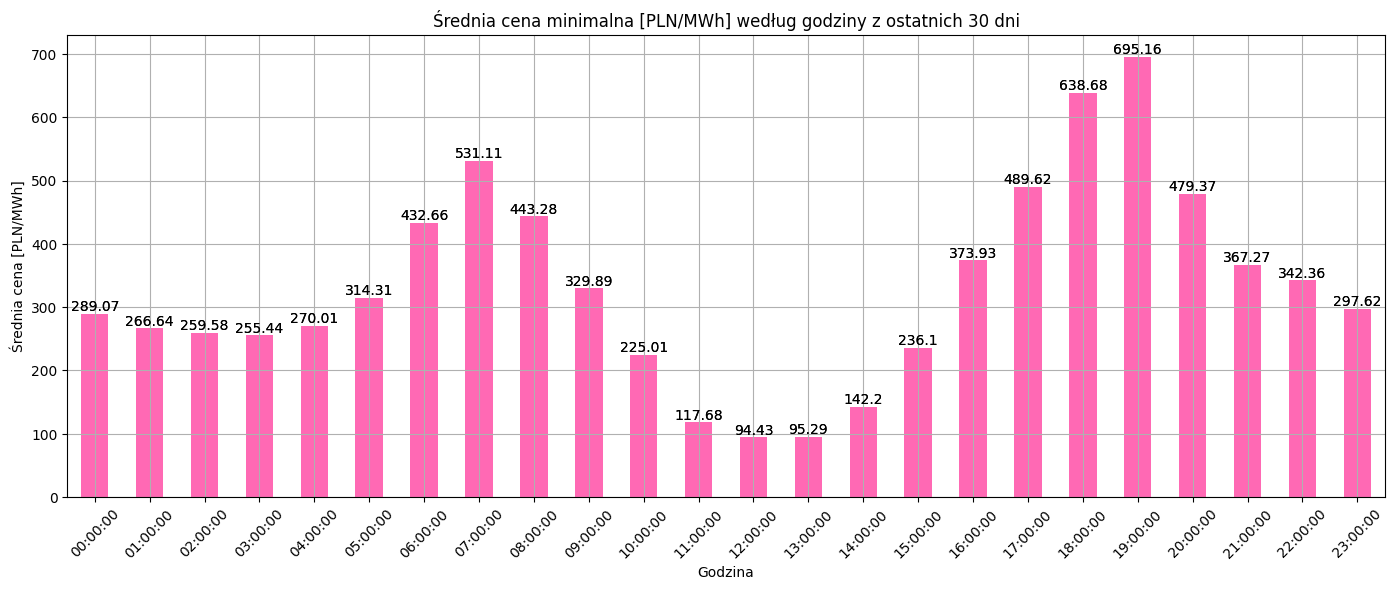

In [82]:
avg_min_price_by_df_30_days = df_30_days.groupby('godzina')['Min. price [PLN/MWh]'].mean()

plt.figure(figsize=(17,6))
avg_min_price_by_df_30_days.plot(kind='bar', color='hotpink')
bars = avg_min_price_by_df_30_days.plot(kind='bar', color='hotpink')
for bar in bars.patches:
    # Dodajemy wartość średniej ceny nad każdym słupkiem
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             round(bar.get_height(), 2), ha='center', va='bottom')
plt.title('Średnia cena minimalna [PLN/MWh] według godziny z ostatnich 30 dni')
plt.xlabel('Godzina')
plt.ylabel('Średnia cena [PLN/MWh]')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#Dane od Patryka

In [83]:
uploaded_2 = files.upload()

Saving Godzinowe-ceny-energii.xltx to Godzinowe-ceny-energii.xltx


In [92]:
#Load the data
df_p = pd.read_excel(io.BytesIO(uploaded_2['Godzinowe-ceny-energii.xltx']), header=2)
df_p.head()

,dzień,Timestamp,01,02,03,04,05,06,07,08,...,15,16,17,18,19,20,21,22,23,24
0,środa,2024-09-11,432.98,409.00,392.19,397.6,409.00,453.00,700.00,800.0,...,434.50,490.00,592.45,890.00,1110.00,1697.00,1226.00,668.20,517.40,440.00
1,wtorek,2024-09-10,428.20,390.00,374.00,372.0,374.00,382.00,503.15,570.0,...,240.11,315.99,446.50,588.00,786.58,1500.00,999.00,622.18,503.15,446.50
2,poniedziałek,2024-09-09,467.90,406.00,408.99,402.0,412.30,446.30,591.40,699.0,...,380.00,409.00,493.40,710.00,900.00,1690.01,1140.00,670.90,499.90,400.00
3,niedziela,2024-09-08,338.60,313.00,313.00,313.0,313.00,368.00,513.31,546.9,...,366.92,391.72,429.00,513.86,570.00,749.88,668.16,503.74,430.00,370.00
4,sobota,2024-09-07,391.00,355.13,342.96,334.9,330.99,330.99,320.00,301.0,...,-82.01,-4.16,184.00,419.00,514.00,651.40,600.00,492.14,420.00,360.11


In [93]:
df_p = df_p.drop('dzień', axis=1)

In [94]:
# zakres dat
min_data_p = min(df_p['Timestamp'])
print(min_data_p)
max_data_p = max(df_p['Timestamp'])
print(max_data_p)

2023-09-01 00:00:00
2024-09-11 00:00:00


In [95]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  377 non-null    datetime64[ns]
 1   01         377 non-null    float64       
 2   02         376 non-null    float64       
 3   03         377 non-null    float64       
 4   04         377 non-null    float64       
 5   05         377 non-null    float64       
 6   06         377 non-null    float64       
 7   07         377 non-null    float64       
 8   08         377 non-null    float64       
 9   09         377 non-null    float64       
 10  10         377 non-null    float64       
 11  11         377 non-null    float64       
 12  12         377 non-null    float64       
 13  13         377 non-null    float64       
 14  14         377 non-null    float64       
 15  15         377 non-null    float64       
 16  16         377 non-null    float64       
 1

In [96]:
df_p.describe()

,Timestamp,01,02,03,04,05,06,07,08,09,...,15,16,17,18,19,20,21,22,23,24
count,377,377.000000,376.00000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,...,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000
mean,2024-03-07 00:00:00.000000256,373.269363,350.31508,340.272440,338.358037,342.225782,360.491008,431.674721,452.519125,433.383767,...,318.456472,356.817719,412.523899,474.507931,548.725915,626.256286,626.834271,529.379045,449.855013,386.499761
min,2023-09-01 00:00:00,-44.990000,-50.00000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-33.000000,...,-360.000000,-293.000000,-111.000000,-15.000000,60.000000,40.000000,10.000000,1.010000,5.010000,1.000000
25%,2023-12-04 00:00:00,308.000000,300.62250,300.000000,296.740000,300.230000,312.930000,352.810000,364.060000,360.000000,...,240.000000,295.900000,346.720000,390.000000,423.380000,437.090000,420.000000,375.730000,349.000000,320.000000
50%,2024-03-07 00:00:00,390.000000,379.51500,374.000000,370.800000,374.720000,386.600000,437.210000,457.610000,434.010000,...,348.850000,376.400000,413.800000,469.000000,507.260000,550.000000,550.000000,492.140000,447.000000,397.120000
75%,2024-06-09 00:00:00,465.000000,420.25000,408.000000,405.000000,411.020000,428.400000,520.000000,550.000000,528.000000,...,420.000000,450.000000,496.980000,550.000000,637.130000,700.000000,714.420000,605.600000,521.070000,463.000000
max,2024-09-11 00:00:00,829.160000,711.99000,600.000000,516.000000,527.370000,582.170000,760.000000,860.000000,766.580000,...,750.000000,779.940000,816.000000,890.000000,1620.020000,2071.180000,2400.000000,2134.960000,1250.000000,800.000000
std,NaN,122.614463,110.95914,108.685651,107.802633,106.464937,106.637815,135.927791,150.677104,147.750415,...,181.983076,169.315126,146.533091,136.754676,190.768953,304.387692,327.185547,253.890392,155.147445,114.270991


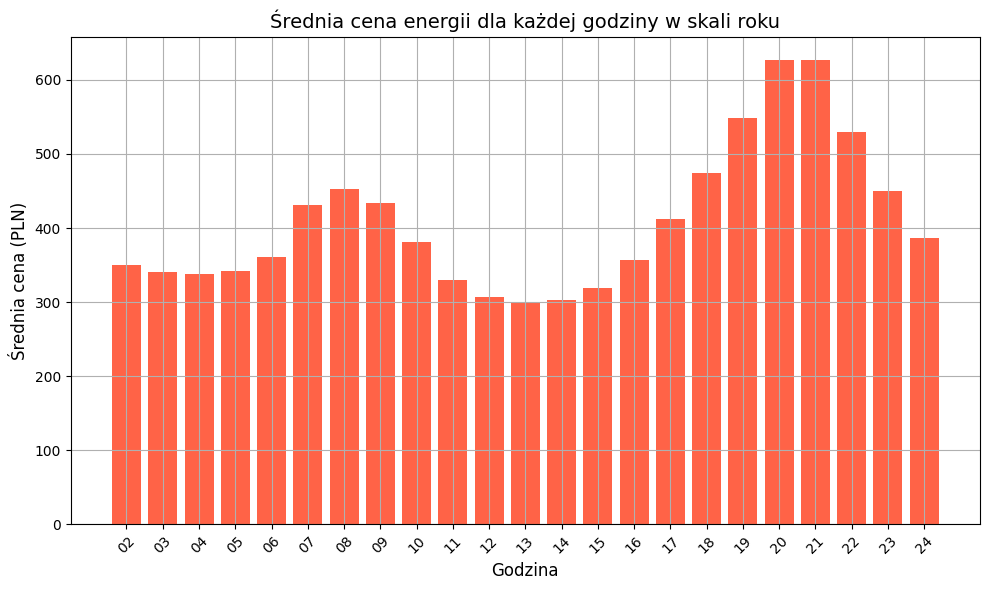

In [130]:
hourly_avg = df_p.iloc[:, 2:].mean()
# Tworzenie wykresu
plt.figure(figsize=(10, 6))
plt.bar(hourly_avg.index, hourly_avg.values, color='tomato')
plt.title('Średnia cena energii dla każdej godziny w skali roku', fontsize=14)
plt.xlabel('Godzina', fontsize=12)
plt.ylabel('Średnia cena (PLN)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#